In [1]:
#import all the necessary libraries
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [10]:
#read the data
data = pd.read_csv("creditcard.csv", index_col=0)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#read the already oversampled training data
SMOTE_TRAIN = pd.read_csv("SMOTE_TRAIN.csv", index_col=0)

print("The first 5 rows in the dataset are :", "\n", SMOTE_TRAIN.head())
print("\n")
print("The shape of the data is :", str(SMOTE_TRAIN.shape))


The first 5 rows in the dataset are : 
          V1        V2        V3        V4        V5        V6        V7  \
0  0.011068  0.672004 -0.939272 -0.345831  0.736893 -0.194330  0.535538   
1 -0.171802  0.667620  0.842058  0.047052 -0.017893 -0.745167  0.544538   
2 -0.126808  0.499145  0.124836 -0.508023  0.152991 -0.616567  0.617461   
3 -0.020276  0.353251 -0.098430 -0.417469  0.744346 -0.046613  0.636477   
4 -2.470840  2.030383 -2.060765 -0.159184 -1.545050 -0.935953 -1.128701   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.249765 -0.455568 -0.961957  ...  0.451002  1.242712 -0.406219 -2.383611   
1 -0.034197 -0.273403 -0.453668  ... -0.370656 -1.020303 -0.018123  0.515668   
2  0.069294  0.176808  0.105910  ... -0.344201 -0.843687  0.179235 -0.081430   
3 -0.005219 -0.013437 -0.326958  ... -0.250802 -0.699250 -0.010929 -2.006373   
4  1.885118  0.135228  0.183920  ...  0.245561 -0.415914  0.828651 -0.030070   

        V25       V26       

In [12]:
#creating features and lables and converting them to arrays
X = SMOTE_TRAIN.iloc[:,:-1].values
y = SMOTE_TRAIN.iloc[:,-1].values.reshape(-1)


In [13]:
#reading the test data
testdata = pd.read_csv("test.csv", index_col=0)
testdata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.595847,0.044364,-0.481136,1.113728,1.565024,3.095099,-0.508951,0.824169,-0.299097,0.524206,...,-0.166002,-0.490298,-0.199473,1.672928,1.492112,0.186982,0.016994,0.045908,-0.254884,0
1,-0.688587,-0.068823,-0.212017,-1.393636,0.840172,-0.328568,0.084269,0.376943,0.495499,-1.384251,...,0.243799,0.714665,-0.907241,-1.762510,-0.272231,-1.588147,0.290746,-0.439877,-0.290407,0
2,1.006327,-0.224225,-0.179463,0.346088,-0.536124,-0.396693,-0.475428,-0.058114,1.291554,-0.161231,...,0.255680,1.129473,0.152159,-0.122846,-0.125282,-0.428931,0.111035,-0.110030,-0.305768,0
3,0.554562,0.049361,0.207085,0.721990,-0.001831,0.182755,-0.018892,0.112511,-0.016392,0.008619,...,-0.128345,-0.280929,-0.103905,-0.519661,1.018941,-0.902021,0.083397,0.032692,-0.200928,0
4,0.079405,0.088783,0.211060,-0.324768,0.705555,-0.438104,0.677387,-0.320620,0.332686,0.352200,...,-0.369743,-0.700626,0.007457,-0.861676,-2.099787,0.192861,-0.931163,-1.113108,-0.336529,0


In [14]:
X_test = testdata.iloc[:,:-1].values
y_test = testdata.iloc[:,-1].values.reshape(-1)

# Gradient Boosting model to find out the best learning rate

In [15]:

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, subsample = 0.9, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X, y)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X, y)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.936
Accuracy score (validation): 0.987
Learning rate:  0.075
Accuracy score (training): 0.944
Accuracy score (validation): 0.985
Learning rate:  0.1
Accuracy score (training): 0.949
Accuracy score (validation): 0.983
Learning rate:  0.25
Accuracy score (training): 0.972
Accuracy score (validation): 0.982
Learning rate:  0.5
Accuracy score (training): 0.985
Accuracy score (validation): 0.983
Learning rate:  0.75
Accuracy score (training): 0.990
Accuracy score (validation): 0.987
Learning rate:  1
Accuracy score (training): 0.992
Accuracy score (validation): 0.988


In [16]:
#building a GB model with learning rate of 1 since it has the best validation accuracy
gb_clf2 = GradientBoostingClassifier(n_estimators=100, subsample = 0.8, learning_rate=1, max_features="sqrt", max_depth=3, random_state=0)
gb_clf2.fit(X, y)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[70853   226]
 [   18   105]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.32      0.85      0.46       123

    accuracy                           1.00     71202
   macro avg       0.66      0.93      0.73     71202
weighted avg       1.00      1.00      1.00     71202



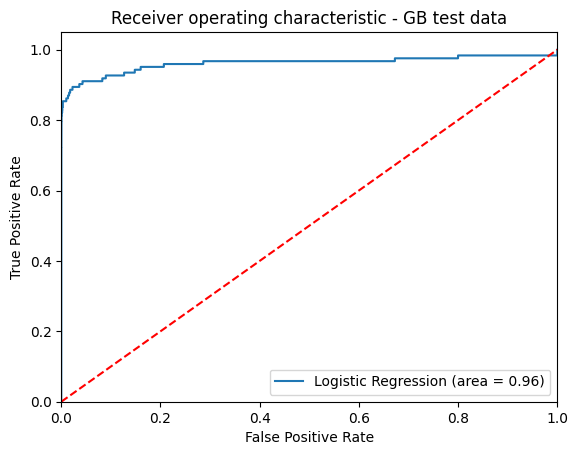

<Figure size 640x480 with 0 Axes>

In [17]:
#roc curve
logit_roc_auc = roc_auc_score(y_test, gb_clf2.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gb_clf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - GB test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()
plt.show()

In [18]:
#another model with different max depth and subsample
gb_clf3 = GradientBoostingClassifier(n_estimators=100, subsample = 0.85, learning_rate=1, max_features="sqrt", max_depth=1, random_state=0)
gb_clf3.fit(X, y)
predictions = gb_clf3.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[69272  1807]
 [    8   115]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.06      0.93      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.97      0.99     71202



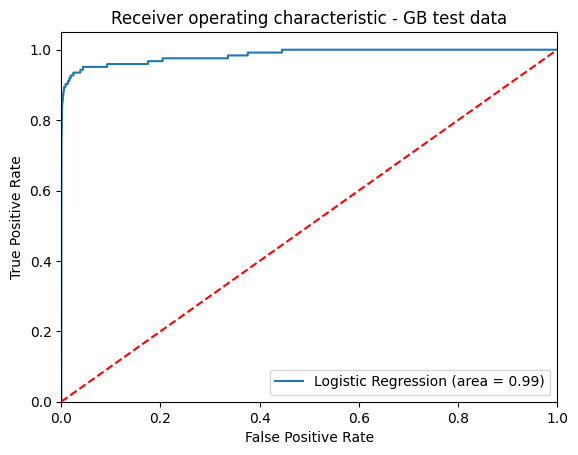

<Figure size 640x480 with 0 Axes>

In [19]:
#roc curve
logit_roc_auc = roc_auc_score(y_test, gb_clf3.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gb_clf3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - GB test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()
plt.show()

In [20]:
#another model with different max depth
gb_clf4 = GradientBoostingClassifier(n_estimators=100, subsample = 0.85, learning_rate=1, max_features="sqrt", max_depth=4, random_state=0)
gb_clf4.fit(X, y)
predictions = gb_clf4.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[64080  6999]
 [   14   109]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71079
           1       0.02      0.89      0.03       123

    accuracy                           0.90     71202
   macro avg       0.51      0.89      0.49     71202
weighted avg       1.00      0.90      0.95     71202



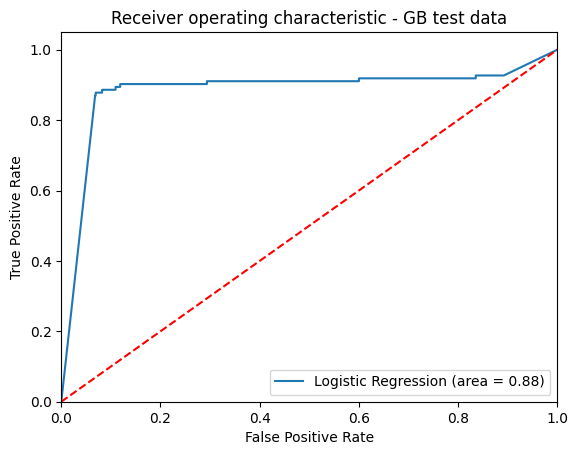

<Figure size 640x480 with 0 Axes>

In [21]:
#roc curve
logit_roc_auc = roc_auc_score(y_test, gb_clf4.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gb_clf4.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - GB test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()
plt.show()

In [22]:
#another GB model with different features and max depth
gb_clf5 = GradientBoostingClassifier(n_estimators=100, subsample = 1, learning_rate=1, max_features=2, max_depth=8, random_state=0)
gb_clf5.fit(X, y)
predictions = gb_clf5.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[51674 19405]
 [   29    94]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     71079
           1       0.00      0.76      0.01       123

    accuracy                           0.73     71202
   macro avg       0.50      0.75      0.43     71202
weighted avg       1.00      0.73      0.84     71202



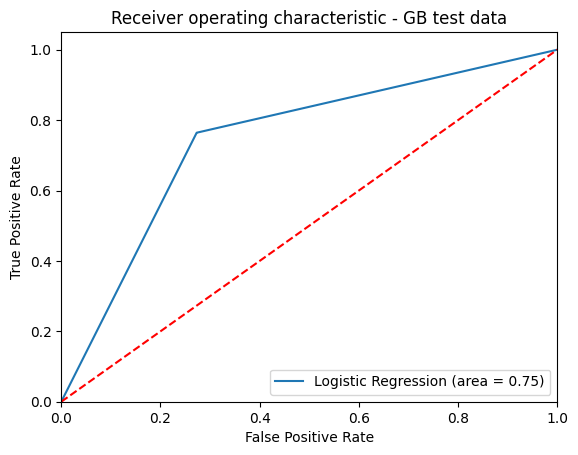

<Figure size 640x480 with 0 Axes>

In [23]:
#roc curve
logit_roc_auc = roc_auc_score(y_test, gb_clf5.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gb_clf5.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - GB test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()
plt.show()